In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("city_temperature.csv")

/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head(5)
data.describe()
data.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
#Create a list of countries most prepared for the economic shock of climate change (MostPrepared_Countries)
#These countries were gotten from the article with link below
#https://www.swissre.com/risk-knowledge/mitigating-climate-risk/countries-economic-shock-climate-change.html

MostPrepared_Countries = ['Finland', 'Switzerland', 'Austria', 'Portugal', 'Canada']

#Filter out the countries contained in the above list, and the year of focus (1995 and 2010) from the temperature data (Data_MostPreparedCountries)
Data_MostPreparedCountries = data.loc[(data['Country'].isin(MostPrepared_Countries )) & (data['Year'].isin([1995, 2010]))]
Data_MostPreparedCountries.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
632643,Europe,Austria,NaN,Vienna,1,1,1995,35.7
632644,Europe,Austria,NaN,Vienna,1,2,1995,34.7
632645,Europe,Austria,NaN,Vienna,1,3,1995,31.4
632646,Europe,Austria,NaN,Vienna,1,4,1995,25.2
632647,Europe,Austria,NaN,Vienna,1,5,1995,23.0


In [18]:
#Deriving the average temperature for each month, for the years 1995 and 2010, for each city in the Countries most prepared for Climate Change (AvgMonthData_MostPreparedCountries)

AvgMonthData_MostPreparedCountries = Data_MostPreparedCountries.groupby(['Country','City', 'Year', 'Month'],as_index=True).AvgTemperature.mean()
print(AvgMonthData_MostPreparedCountries)

Country      City    Year  Month
Austria      Vienna  1995  1        31.867742
                           2        42.178571
                           3        39.864516
                           4        50.970000
                           5        58.025806
                                      ...    
Switzerland  Zurich  2010  8        62.903226
                           9        55.680000
                           10       47.683871
                           11       41.510000
                           12       30.516129
Name: AvgTemperature, Length: 380, dtype: float64


In [8]:
#Deriving the maximum temperature for the years 1995 and 2010, for each city in the Countries most prepared for Climate Change(MaxTemp_MostPreparedCountries)
MaxTemp_MostPreparedCountries = AvgMonthData_MostPreparedCountries.groupby(['Country','City', 'Year'],as_index=False).AvgTemperature.max()
print(MaxTemp_MostPreparedCountries)

        Country       City  Year  AvgTemperature
0       Austria     Vienna  1995       72.680645
1       Austria     Vienna  2010       71.480645
2        Canada    Calgary  1995       59.729032
3        Canada    Calgary  2010       61.280645
4        Canada   Edmonton  1995       62.593548
5        Canada   Edmonton  2010       63.767742
6        Canada    Halifax  1995       66.232258
7        Canada    Halifax  2010       66.580645
8        Canada   Montreal  1995       72.122581
9        Canada   Montreal  2010       73.580645
10       Canada     Ottawa  1995       71.141935
11       Canada     Ottawa  2010       72.561290
12       Canada     Quebec  1995       69.441935
13       Canada     Quebec  2010       70.503226
14       Canada     Regina  1995       65.490323
15       Canada     Regina  2010       64.803226
16       Canada    Toronto  1995       71.616129
17       Canada    Toronto  2010       74.393548
18       Canada  Vancouver  1995       65.145161
19       Canada  Van

In [9]:
#Deriving the maximum temperature for each country based on the city with the highest temperature for 1995 and 2010 (MaxtempPerYear)
MaxtempPerYear = MaxTemp_MostPreparedCountries.groupby(['Country', 'Year'],as_index=False).AvgTemperature.max()
print(MaxtempPerYear)

       Country  Year  AvgTemperature
0      Austria  1995       72.680645
1      Austria  2010       71.480645
2       Canada  1995       72.122581
3       Canada  2010       74.393548
4      Finland  1995       63.646667
5      Finland  2010       72.206452
6     Portugal  1995       75.938710
7     Portugal  2010       77.332258
8  Switzerland  1995       71.393548
9  Switzerland  2010       72.506452


In [10]:
#Seperating the temperature values for year 1995 into seperate dataframe (Maxtemp_1995)
Maxtemp_1995 = MaxtempPerYear.loc[MaxtempPerYear['Year'] == 1995]
print(Maxtemp_1995)

#Renaming 'Avgtemperature' to 'Temperature in 1995'
Maxtemp_1995.rename(columns = {'AvgTemperature':'Temperature in 1995'}, inplace = True)
print(Maxtemp_1995)

#Seperating the temperature values for year 2010 into seperate dataframe (Maxtemp_2010)
Maxtemp_2010 = MaxtempPerYear.loc[MaxtempPerYear['Year'] == 2010]
print(Maxtemp_2010)

#Renaming 'Avgtemperature' to 'Temperature in 2010'
Maxtemp_2010.rename(columns = {'AvgTemperature':'Temperature in 2010'}, inplace = True)
print(Maxtemp_2010)

#Merging the two dataframes, based on the key 'Country' (LeastAffectedCountries_Data)
LeastAffectedCountries_Data = pd.merge(Maxtemp_1995,Maxtemp_2010,on='Country')
print(LeastAffectedCountries_Data)

#Drop the Columns 'Year_x' and 'Year_y' (LeastAffectedCountries_FinalData)
LeastAffectedCountries_FinalData =LeastAffectedCountries_Data.drop(['Year_x', 'Year_y'], axis=1)
print(LeastAffectedCountries_FinalData)



       Country  Year  AvgTemperature
0      Austria  1995       72.680645
2       Canada  1995       72.122581
4      Finland  1995       63.646667
6     Portugal  1995       75.938710
8  Switzerland  1995       71.393548
       Country  Year  Temperature in 1995
0      Austria  1995            72.680645
2       Canada  1995            72.122581
4      Finland  1995            63.646667
6     Portugal  1995            75.938710
8  Switzerland  1995            71.393548
       Country  Year  AvgTemperature
1      Austria  2010       71.480645
3       Canada  2010       74.393548
5      Finland  2010       72.206452
7     Portugal  2010       77.332258
9  Switzerland  2010       72.506452
       Country  Year  Temperature in 2010
1      Austria  2010            71.480645
3       Canada  2010            74.393548
5      Finland  2010            72.206452
7     Portugal  2010            77.332258
9  Switzerland  2010            72.506452
       Country  Year_x  Temperature in 1995  Year_y 

/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


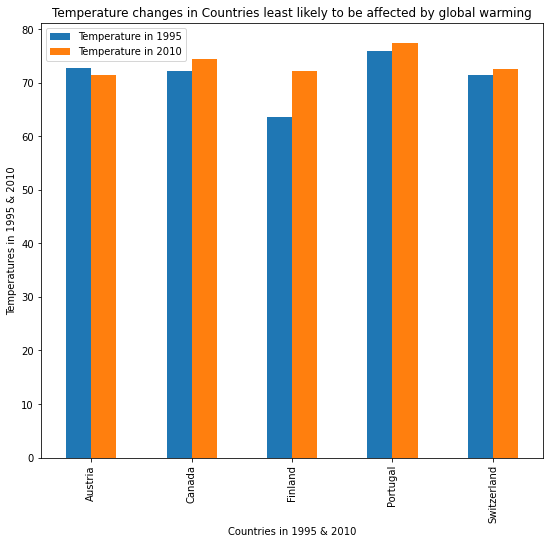

In [11]:
#Plotting the temperature values for each country for 1995 and 2010
LeastAffectedCountries_FinalData.plot(x="Country", y=["Temperature in 1995", "Temperature in 2010"], kind="bar",figsize=(9,8))
plt.xlabel("Countries in 1995 & 2010")
plt.ylabel("Temperatures in 1995 & 2010")
plt.title('Temperature changes in Countries least likely to be affected by global warming')
plt.show()


Data Preparation for Countries least prepared for Climate change.

In [12]:
#Create a list of countries least prepared for the shock of climate change (LeastPrepared_Countries)
#These countries were gotten from the article with link below
#https://www.swissre.com/risk-knowledge/mitigating-climate-risk/countries-economic-shock-climate-change.html

LeastPrepared_Countries = ['India', 'Thailand', 'Philippines', 'Malaysia', 'Indonesia']

#Filter out the countries contained in the above list, and the year of focus (1995 and 2010) from the temperature data (Data_LeastPreparedCountries)
Data_LeastPreparedCountries = data.loc[(data['Country'].isin(LeastPrepared_Countries )) & (data['Year'].isin([1995, 2010]))]
Data_LeastPreparedCountries.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3


In [13]:
#Deriving the average temperature for each month, for the years 1995 and 2010, for each city in the Countries least for Climate Change (AvgMonthData_LeastPreparedCountries)

AvgMonthData_LeastPreparedCountries = Data_LeastPreparedCountries.groupby(['Country','City', 'Year', 'Month'],as_index=False).AvgTemperature.mean()
print(AvgMonthData_LeastPreparedCountries)

      Country             City  Year  Month  AvgTemperature
0       India  Bombay (Mumbai)  1995      1       72.393548
1       India  Bombay (Mumbai)  1995      2       76.214286
2       India  Bombay (Mumbai)  1995      3       73.638710
3       India  Bombay (Mumbai)  1995      4       84.120000
4       India  Bombay (Mumbai)  1995      5       86.819355
..        ...              ...   ...    ...             ...
187  Thailand          Bangkok  2010      8       82.854839
188  Thailand          Bangkok  2010      9       83.020000
189  Thailand          Bangkok  2010     10       81.716129
190  Thailand          Bangkok  2010     11       82.086667
191  Thailand          Bangkok  2010     12       80.761290

[192 rows x 5 columns]


In [14]:
#Deriving the maximum temperature for the years 1995 and 2010, for each city in the Countries least prepared for Climate Change(MaxTemp_LeastPreparedCountries)
MaxTemp_LeastPreparedCountries = AvgMonthData_LeastPreparedCountries.groupby(['Country','City', 'Year'],as_index=False).AvgTemperature.max()
print(MaxTemp_LeastPreparedCountries)

        Country              City  Year  AvgTemperature
0         India   Bombay (Mumbai)  1995       87.270000
1         India   Bombay (Mumbai)  2010       87.890323
2         India          Calcutta  1995       87.636667
3         India          Calcutta  2010       88.843333
4         India  Chennai (Madras)  1995       86.645161
5         India  Chennai (Madras)  2010       88.667742
6         India             Delhi  1995       95.830000
7         India             Delhi  2010       94.348387
8     Indonesia           Jakarta  1995       75.254839
9     Indonesia           Jakarta  2010       85.823333
10     Malaysia      Kuala Lumpur  1995       82.838710
11     Malaysia      Kuala Lumpur  2010       85.012903
12  Philippines            Manila  1995       84.650000
13  Philippines            Manila  2010       88.145161
14     Thailand           Bangkok  1995      -99.000000
15     Thailand           Bangkok  2010       88.603333


In [15]:
#Deriving the maximum temperature for each country based on the city with the highest temperature for 1995 and 2010 (MaxtempPerYear)
MaxtempPerYear2 = MaxTemp_LeastPreparedCountries.groupby(['Country', 'Year'],as_index=False).AvgTemperature.max()
print(MaxtempPerYear2)

       Country  Year  AvgTemperature
0        India  1995       95.830000
1        India  2010       94.348387
2    Indonesia  1995       75.254839
3    Indonesia  2010       85.823333
4     Malaysia  1995       82.838710
5     Malaysia  2010       85.012903
6  Philippines  1995       84.650000
7  Philippines  2010       88.145161
8     Thailand  1995      -99.000000
9     Thailand  2010       88.603333


In [16]:
#Seperating the temperature values for year 1995 into seperate dataframe (Maxtemp2_1995)
Maxtemp2_1995 = MaxtempPerYear2.loc[MaxtempPerYear['Year'] == 1995]
print(Maxtemp2_1995)

#Renaming 'Avgtemperature' to 'Temperature in 1995'
Maxtemp2_1995.rename(columns = {'AvgTemperature':'Temperature in 1995'}, inplace = True)
print(Maxtemp2_1995)

#Seperating the temperature values for year 2010 into seperate dataframe (Maxtemp2_2010)
Maxtemp2_2010 = MaxtempPerYear2.loc[MaxtempPerYear['Year'] == 2010]
print(Maxtemp2_2010)

#Renaming 'Avgtemperature' to 'Temperature in 2010'
Maxtemp2_2010.rename(columns = {'AvgTemperature':'Temperature in 2010'}, inplace = True)
print(Maxtemp2_2010)

#Merging the two dataframes, based on the key 'Country' (MostAffectedCountries_Data)
MostAffectedCountries_Data = pd.merge(Maxtemp2_1995,Maxtemp2_2010,on='Country')
print(MostAffectedCountries_Data)

#Drop the Columns 'Year_x' and 'Year_y' (MostAffectedCountries_FinalData)
MostAffectedCountries_FinalData =MostAffectedCountries_Data.drop(['Year_x', 'Year_y'], axis=1)
print(MostAffectedCountries_FinalData)



       Country  Year  AvgTemperature
0        India  1995       95.830000
2    Indonesia  1995       75.254839
4     Malaysia  1995       82.838710
6  Philippines  1995       84.650000
8     Thailand  1995      -99.000000
       Country  Year  Temperature in 1995
0        India  1995            95.830000
2    Indonesia  1995            75.254839
4     Malaysia  1995            82.838710
6  Philippines  1995            84.650000
8     Thailand  1995           -99.000000
       Country  Year  AvgTemperature
1        India  2010       94.348387
3    Indonesia  2010       85.823333
5     Malaysia  2010       85.012903
7  Philippines  2010       88.145161
9     Thailand  2010       88.603333
       Country  Year  Temperature in 2010
1        India  2010            94.348387
3    Indonesia  2010            85.823333
5     Malaysia  2010            85.012903
7  Philippines  2010            88.145161
9     Thailand  2010            88.603333
       Country  Year_x  Temperature in 1995  Year_y 

/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/feekah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


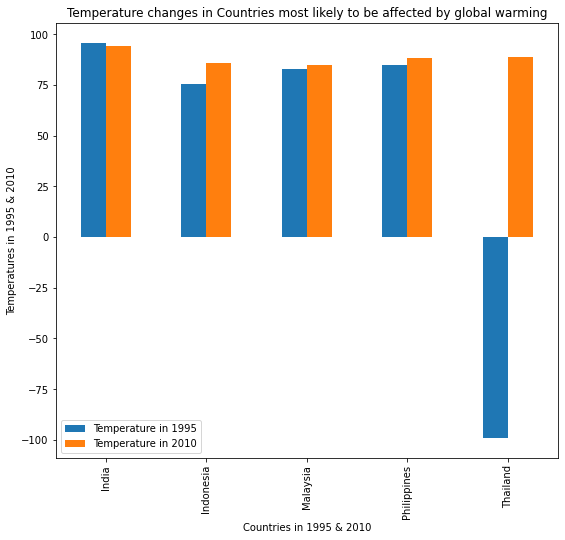

In [17]:
#Plotting the temperature values for each country for 1995 and 2010
MostAffectedCountries_FinalData.plot(x="Country", y=["Temperature in 1995", "Temperature in 2010"], kind="bar",figsize=(9,8))
plt.xlabel("Countries in 1995 & 2010")
plt.ylabel("Temperatures in 1995 & 2010")
plt.title('Temperature changes in Countries most likely to be affected by global warming')
plt.show()